In [1]:
#pip install reportlab
import json
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import itertools
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
with open('dataset.json', 'r') as file:
    data = json.load(file)

print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
len(data)

16455

In [4]:
# extract images of one restaurant
one_restaurant_info=data[0]['more_details']['full_images']
one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
one_restaurant_images

['2088757', '2182000', '4151606', '4151588', '2224983']

In [5]:
# do this for all restaurants

res_image_dic={}
for res in data:
    res_id=res['identifier']
    one_restaurant_info=res['more_details']['full_images']
    one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
    res_image_dic[res_id]=one_restaurant_images

In [6]:
# check if restaurant ids are unique
len(list(res_image_dic.keys()))== len(set(res_image_dic.keys()))

True

In [7]:
# list of all restaurant images
nested_list=list(res_image_dic.values())
image_names = list(itertools.chain(*nested_list))
#image_names

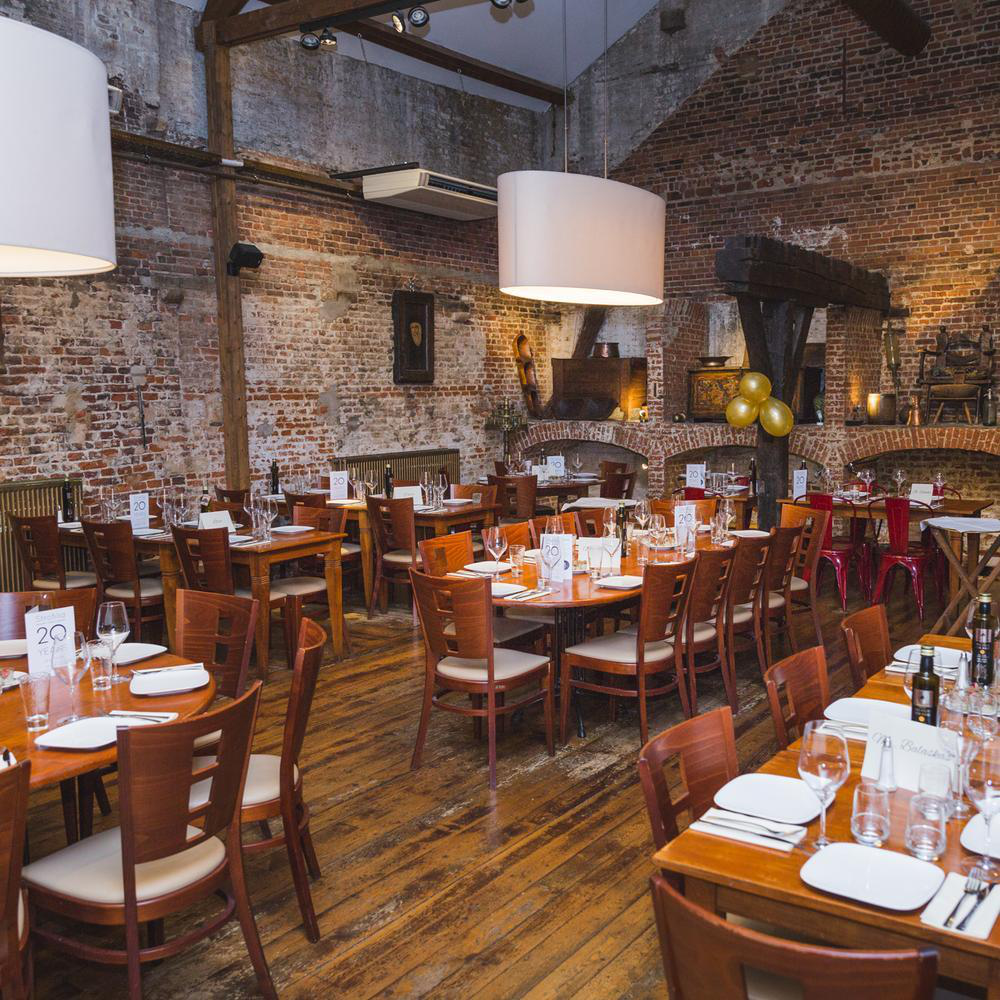

In [8]:
# test reading an image
folder_path = 'images'
image_path=folder_path + '/' + '4151606' + '.jpg'
img=Image.open(image_path)
img

In [9]:
# reading all images in a restaurant setting 
all_images={}
folder_path = 'images'
target_size = (256, 256) # need to resize because some images do not have the same shap

iteration=0 # read only 100 images for now
for name in image_names:
    iteration+=1
    file_name=name + '.jpg'
    image_path = folder_path + '/' + file_name
    if iteration <=100:
        try:
            with Image.open(image_path) as img:
                img = img.resize(target_size)
                image_array = np.array(img)

                all_images[name]=image_array
            #print(name)
        except:
            print(f"Error opening file '{file_name}', skipping...")
            continue

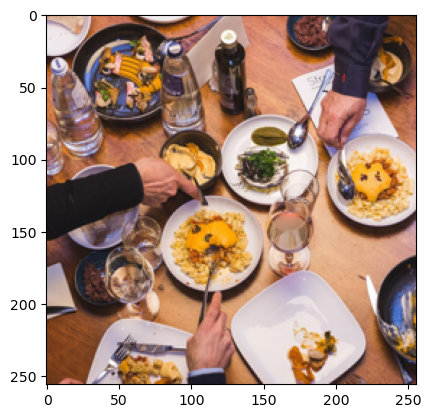

In [10]:
# plot one image based on id
plt.imshow(all_images['2182000'], cmap='gray')
plt.show()

# use manual labels

In [23]:
# path to the folder containing the JSON files
folder_path = 'images_labelled/'
# get a list of all the files in the folder
file_list = os.listdir(folder_path)

label_dict={}
# iterate over the files
for file_name in file_list:
    # check if the file is a JSON file
    if file_name.endswith('.json'):
        # construct the full path to the file
        file_path = os.path.join(folder_path, file_name)
        # open the file and read its contents
        with open(file_path, 'r') as file:
            json_data = json.load(file)        
        txt=json_data['imagePath']
        image_id=txt.split(".")[0]
        label_dict[image_id]=int(json_data['flags']['restaurant'])
        print(json_data)

{'version': '5.1.1', 'flags': {'food': True, 'restaurant': False, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '213777.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': True, 'restaurant': False, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '214548.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': False, 'restaurant': True, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '215836.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': False, 'restaurant': True, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '214374.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food

{'version': '5.1.1', 'flags': {'food': False, 'restaurant': True, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '214910.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': True, 'restaurant': False, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '213386.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': True, 'restaurant': False, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '213502.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food': True, 'restaurant': False, 'logo': False, 'chef': False, 'food_preparation': False, 'other': False}, 'shapes': [], 'imagePath': '215086.jpg', 'imageData': None, 'imageHeight': 1000, 'imageWidth': 1000}
{'version': '5.1.1', 'flags': {'food

In [33]:
# just use the previous model to predict and see the outcome

image_names_test=list(label_dict.keys())
image_labels_test=list(label_dict.values())

In [34]:
# reading all images in a restaurant setting 
#all_test_images={}
folder_path = 'images'
target_size = (256, 256) # need to resize because some images do not have the same shap

# read all
test_label=[]
new_test_image_list= []
for ind,name in enumerate(image_names_test):
    file_name=name + '.jpg'
    image_path = folder_path + '/' + file_name
    try:
        with Image.open(image_path) as img:
            img = img.resize(target_size)
            image_array = np.array(img)
            #all_test_images[name]=image_array       
            new_test_image_list.append(image_array)
            test_label.append(image_labels_test[ind])
            #print(name)
    except:
        print(f"Error opening file '{file_name}', skipping...")
        continue

In [35]:
print('read ' + str(len(new_test_image_list)) + ' images')

read 535 images


In [36]:
sum(test_label)/len(test_label)
# there is a slight issue of class imbalance, accuracy is not be the best metric

0.33457943925233646

In [37]:
new_test=np.array(new_test_image_list)
new_test.shape

(535, 256, 256, 3)

In [38]:
# create a new model on the test data

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    new_test, np.array(test_label), test_size=0.2, random_state=42)

In [46]:
# Load the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze pre-trained layers (compare with no freezing)
for layer in base_model.layers:
    layer.trainable = False

# Define your own classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
import tensorflow as tf

Epoch 1/5
14/14 [==============================] - 124s 9s/step - loss: 7.6137e-10 - accuracy: 1.0000 - val_loss: 2.4354 - val_accuracy: 0.9720
Epoch 2/5
14/14 [==============================] - 107s 8s/step - loss: 6.2609e-10 - accuracy: 1.0000 - val_loss: 2.4354 - val_accuracy: 0.9720


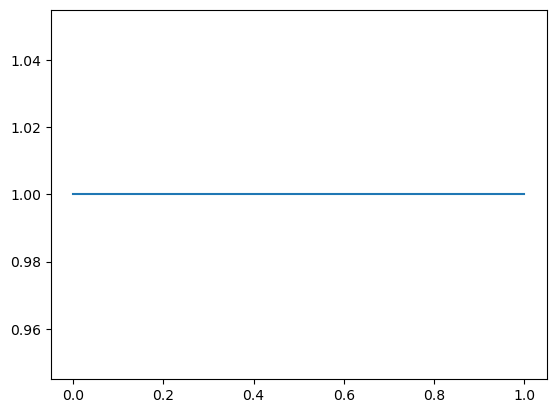

4/4 [==============================] - 25s 6s/step - loss: 2.4354 - accuracy: 0.9720
Test accuracy: 0.9719626307487488


In [54]:
# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[callback],
                    validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'])
plt.show()

# Evaluate the model on test set
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

In [61]:
history.history

{'loss': [7.613679686713226e-10, 6.260866269869325e-10],
 'accuracy': [1.0, 1.0],
 'val_loss': [2.435408353805542, 2.4354405403137207],
 'val_accuracy': [0.9719626307487488, 0.9719626307487488]}

In [63]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.show()

In [55]:
# save the model

model.save_weights("food_interior_classifier2.h5")

In [56]:
model_predictions_test=model.predict(X_test)

4/4 [==============================] - 18s 4s/step
